In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\naslu\OneDrive\Desktop\data sets\Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# Data Exploration

In [8]:
# Identifying datatypes of features within the dataset
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [10]:
# Statistical Summary of the dataset
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [11]:
#null or missing values in each feature and datatypes of the features.
df.isnull()

,Company,Age,Salary,Place,Country,Gender
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
143,False,False,False,False,False,False
144,False,False,False,False,False,False
145,False,False,False,False,False,False
146,False,False,False,False,False,False


In [20]:
# Identifying unique values in each feature and finding its length
for column in df.columns:
    print('\033[1m',column,'\033[0m')
    print("unique values:",df[column].unique())
    print("length:",df[column].nunique())

 Company 
unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
length: 6
 Age 
unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
length: 29
 Salary 
unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
length: 40
 Place 
unique values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
length: 11
 Country 
unique values: ['India']
length: 1
 Gender 
unique values: [0 1]
length: 2


# Data Cleaning

#From above list of company values the following company names which actually represent the same company, are treated asdifferent. Tata Consultancy Services and TCS Infosys and Infosys Pvt Lmt CTS and Cognizant Replacing above values.


In [21]:
df['Company'].replace('Tata Consultancy Services','TCS',inplace=True)
df['Company'].replace('Infosys Pvt Lmt','Infosys',inplace=True)
df['Company'].replace('Congnizant','CTS',inplace=True)


In [24]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan], dtype=object)

## Removing duplicate raws in the data set

In [26]:
df[df.duplicated()]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [27]:
#Removing duplicate rows
df = df.drop_duplicates()

In [29]:
#checking
df.shape
df[df.duplicated()]

,Company,Age,Salary,Place,Country,Gender


"Before dropping the duplicated rows, we had 148 rows, and now the data shows 144 rows, which means we have successfully dropped the duplicate rows."

In [36]:
#Replacing value 0 in Age column with Nan
df['Age'].replace(0, np.nan, inplace=True)

C:\Users\naslu\AppData\Local\Temp\ipykernel_15680\3976176091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].replace(0, np.nan, inplace=True)


In [39]:
df['Age'].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17., 54.])

#### Removing duplicate rows in the dataset


In [4]:
#Identifying duplicate rows
df[df.duplicated()]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [5]:
#Removing duplicate rows
df=df.drop_duplicates()

#checking for duplicate rows
print(df.shape)
df[df.duplicated()]

(144, 6)


,Company,Age,Salary,Place,Country,Gender


Replacing value 0 in Age column with Nan


In [6]:
df['Age'].replace(0, np.nan, inplace=True)


C:\Users\naslu\AppData\Local\Temp\ipykernel_14672\2118625280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].replace(0, np.nan, inplace=True)


### Identifying and replacing column wise missing values


In [7]:
#column wise count of missing values
df.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

### Categorical and numerical data in the dataset


In [8]:
print("Categorical columns are:",df.select_dtypes(include=['object']).columns)
print("Numerical columns are:",df.select_dtypes(exclude=['object']).columns)

Categorical columns are: Index(['Company', 'Place', 'Country'], dtype='object')
Numerical columns are: Index(['Age', 'Salary', 'Gender'], dtype='object')


### Replacing missing values in categorical Company, Place columns with most frequent value.


In [9]:
# Finding most frequent value of 'Company' column
df['Company'].value_counts()

TCS                          52
Infosys                      43
CTS                          35
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: Company, dtype: int64

In [10]:
df['Company'].value_counts().idxmax()


'TCS'

In [11]:
#Replacing missing values in Company column with most frequent value
df["Company"].replace(np.nan, "TCS", inplace=True)


C:\Users\naslu\AppData\Local\Temp\ipykernel_14672\2994781804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Company"].replace(np.nan, "TCS", inplace=True)


In [12]:
# Finding most frequent value of 'Place' column
df['Place'].value_counts()

Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: Place, dtype: int64

In [13]:
df['Place'].value_counts().idxmax()


'Mumbai'

In [14]:
#Replacing missing values in Place column with most frequent value
df["Place"].replace(np.nan, "Mumbai", inplace=True)

C:\Users\naslu\AppData\Local\Temp\ipykernel_14672\2189558148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Place"].replace(np.nan, "Mumbai", inplace=True)


In [15]:
nan_counts = df['Company'].isna().value_counts()
print(nan_counts)

False    144
Name: Company, dtype: int64


In [16]:
nan_counts = df['Place'].isna().value_counts()
print(nan_counts)

False    144
Name: Place, dtype: int64


### Detecting and removing Outliers in Numerical Columns: Age, Salary
#### Box plot of Age of Employees


Text(0.5, 1.0, 'Age Distribution of Employees')

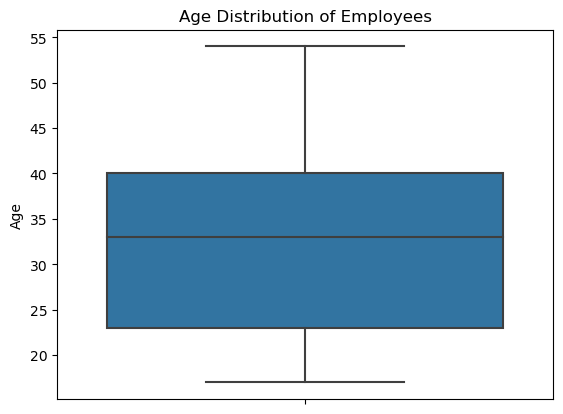

In [17]:
sns.boxplot(data=df, y='Age')
plt.title("Age Distribution of Employees")

##### Detecting outliers in 'Age' using IQR method


In [18]:
column = 'Age'

#Lower and upper quartiles
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)


#IQR (Interquartile Range)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound=",lower_bound,"\nUpper Bound=",upper_bound)

# Detecting outliers based on the bounds
print("Outliers detected using IQR Method:")
outlier=df[(df[column] < lower_bound) | (df[column] > upper_bound)]
if outlier.empty:
    print("There are no outliers")
else:
    print(outlier)

Lower Bound= -2.5 
Upper Bound= 65.5
Outliers detected using IQR Method:
There are no outliers


Text(0.5, 1.0, 'Salary Distribution of Employees')

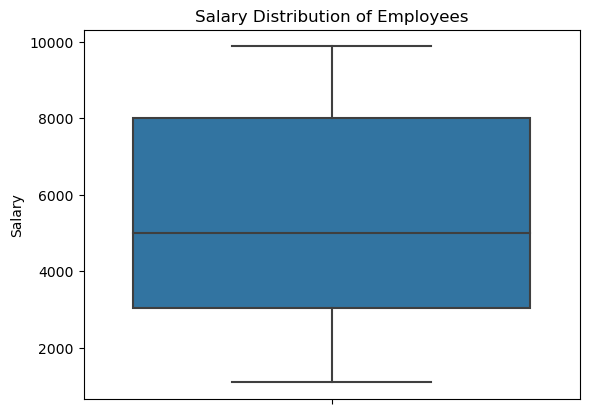

In [19]:
#Box plot of Salary of Employees
sns.boxplot(data=df, y='Salary')
plt.title("Salary Distribution of Employees")

In [20]:
#Detecting outliers in 'Salary' using IQR method
column = 'Salary'

#Lower and upper quartiles
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)


#IQR (Interquartile Range)
IQR = Q3 - Q1

#lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound=",lower_bound,"\nUpper Bound=",upper_bound)

# Detecting outliers based on the bounds
print("Outliers detected using IQR Method:")
outlier=df[(df[column] < lower_bound) | (df[column] > upper_bound)]
if outlier.empty:
    print("There are no outliers")
else:
    print(outlier)

Lower Bound= -4425.0 
Upper Bound= 15455.0
Outliers detected using IQR Method:
There are no outliers


### Replacing missing values in numerical Age,Salary columns with mean value.


In [21]:
#Calculate average of Age column
mean_age = df['Age'].mean()
print("Average of Age:",mean_age)

Average of Age: 32.04132231404959


In [22]:
#Replace NaN values with Average Age
df["Age"].replace(np.nan, mean_age,inplace = True)

C:\Users\naslu\AppData\Local\Temp\ipykernel_14672\350204180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"].replace(np.nan, mean_age,inplace = True)


In [23]:
df['Age'].dtype


dtype('float64')

In [24]:
#converting data type of Age column from float to int
df["Age"]=df["Age"].astype(int)

C:\Users\naslu\AppData\Local\Temp\ipykernel_14672\3687608372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=df["Age"].astype(int)


In [25]:
df["Age"].dtype


dtype('int32')

In [26]:
#Calculate average of Salary column
mean_salary = df['Salary'].mean()
print("Average of Salary:",mean_salary)

Average of Salary: 5283.471074380165


In [27]:
#Replace NaN values with Average Salary
df["Salary"].replace(np.nan, mean_salary,inplace = True)

C:\Users\naslu\AppData\Local\Temp\ipykernel_14672\2511508531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Salary"].replace(np.nan, mean_salary,inplace = True)


In [28]:
# Structure of dataframe after removal od duplicate rows and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    int32  
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 7.3+ KB


## Data analysis

### Correlation between Age and Salary 

Correlation between Age and Salary is: -0.020278679055807724


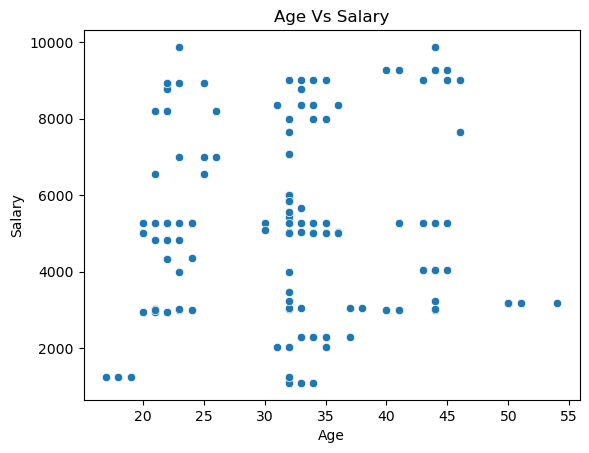

In [29]:
#Scatter plot of Age and Salary
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Age Vs Salary')

#Calculating correlation between Age and Salary
correlation = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary is:",correlation)

In [30]:
#Employees with age >40 and salary<5000
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50,3184.0,Delhi,India,0
32,Infosys,45,4034.0,Calcutta,India,0
39,Infosys,41,3000.0,Mumbai,India,0
50,Infosys,41,3000.0,Chennai,India,0
57,Infosys,51,3184.0,Hyderabad,India,0
68,Infosys,43,4034.0,Mumbai,India,0
75,Infosys,44,3000.0,Cochin,India,0
86,Infosys,41,3000.0,Delhi,India,0
93,Infosys,54,3184.0,Mumbai,India,0
104,Infosys,44,4034.0,Delhi,India,0


In [31]:
#Place wise count of employees
#count of employees from each place
location_count = pd.DataFrame(df['Place'].value_counts())
location_count.reset_index(inplace=True)
location_count.columns = ['Place', 'Count']

# Sorting the DataFrame by the 'Place' column in alphabetical order
location_count.sort_values(by='Place', inplace=True)
location_count.reset_index(drop=True, inplace=True)

print("Place wise count of employees")
location_count

Place wise count of employees


,Place,Count
0,Bhopal,1
1,Calcutta,32
2,Chennai,14
3,Cochin,13
4,Delhi,14
5,Hyderabad,8
6,Mumbai,48
7,Nagpur,1
8,Noida,8
9,Podicherry,3


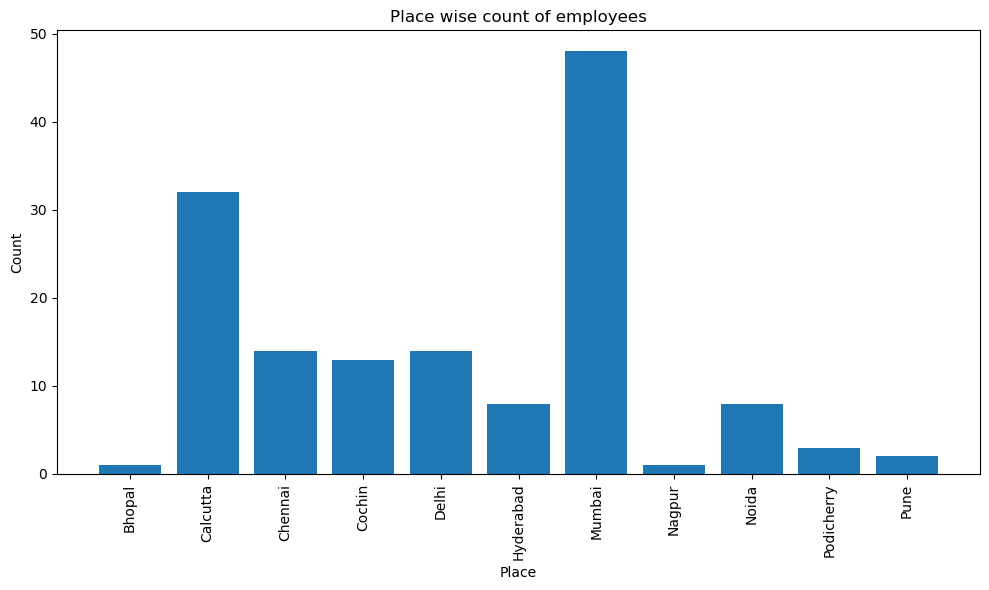

In [32]:
#Bar Plot of Place
plt.figure(figsize=(10, 6))
plt.bar(location_count['Place'], location_count['Count'])
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Place wise count of employees')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

Gender Count:
 0    112
1     32
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender Countplot')

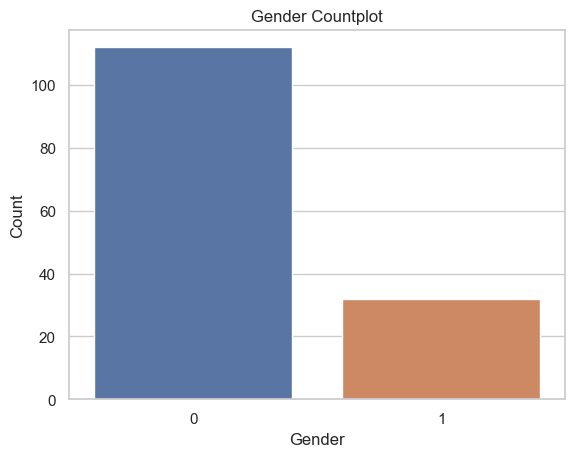

In [33]:
#Gender- countplot
print("Gender Count:\n",df['Gender'].value_counts())
sns.set(style="whitegrid")
sns.countplot(x='Gender', data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Countplot")

Text(0.5, 1.0, 'Gender vs. Salary')

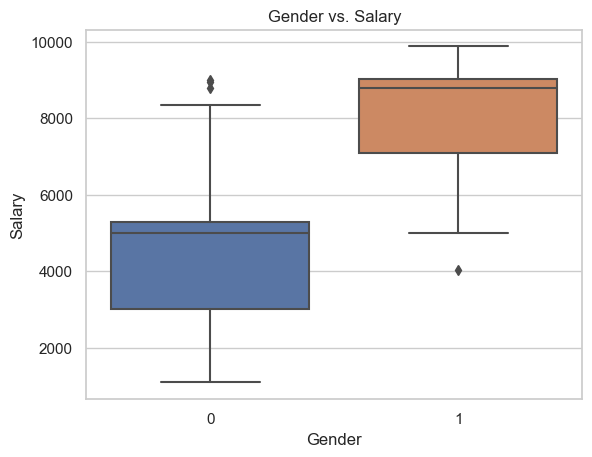

In [34]:
#Gender wise Salary Distribution
sns.set(style="whitegrid")
sns.boxplot(x='Gender', y='Salary', data=df)
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.title("Gender vs. Salary")

# Data Encoding


In [35]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20,5283.471074,Chennai,India,0
1,Infosys,30,5283.471074,Mumbai,India,0
2,TCS,35,2300.000000,Calcutta,India,0
3,Infosys,40,3000.000000,Delhi,India,0
4,TCS,23,4000.000000,Mumbai,India,0


### One-Hot Encoding on 'Company' and 'Place' Columns


In [37]:
#Applying One-Hot-Encoding on 'Company' column
company_dummy = pd.get_dummies(df['Company']).astype(int)
company_dummy.head()

,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0


In [38]:
#Applying One-Hot-Encoding on 'Place' column
place_dummy = pd.get_dummies(df['Place']).astype(int)
place_dummy.head()

,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [39]:
# Concatenating the original dataframe df and encoded company_dummy and place_dummy to a new dataframe df1.
df1 = pd.concat([df,company_dummy,place_dummy],axis=1)
df1.head()


,Company,Age,Salary,Place,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,...,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,TCS,20,5283.471074,Chennai,India,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Infosys,30,5283.471074,Mumbai,India,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,TCS,35,2300.000000,Calcutta,India,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Infosys,40,3000.000000,Delhi,India,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,TCS,23,4000.000000,Mumbai,India,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
#Dropping Company and Place columns
df1.drop(['Company','Place'],axis=1,inplace=True)

In [41]:
df1.columns

Index(['Age', 'Salary', 'Country', 'Gender', 'CTS', 'Congnizant', 'Infosys',
       'Infosys Pvt Lmt', 'TCS', 'Tata Consultancy Services', 'Bhopal',
       'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai',
       'Nagpur', 'Noida', 'Podicherry', 'Pune'],
      dtype='object')

In [42]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20,5283.471074,Chennai,India,0
1,Infosys,30,5283.471074,Mumbai,India,0
2,TCS,35,2300.000000,Calcutta,India,0
3,Infosys,40,3000.000000,Delhi,India,0
4,TCS,23,4000.000000,Mumbai,India,0


### Label Encoding on 'Country' Column


In [43]:
#Applying Label Encoding on Country Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Country']=le.fit_transform(df1['Country'])
df1.head()

,Age,Salary,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,...,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,20,5283.471074,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,30,5283.471074,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35,2300.000000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,40,3000.000000,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,23,4000.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Train Test Split of Dataset


In [44]:
df1.head()

,Age,Salary,Country,Gender,CTS,Congnizant,Infosys,Infosys Pvt Lmt,TCS,Tata Consultancy Services,...,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,20,5283.471074,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,30,5283.471074,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35,2300.000000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,40,3000.000000,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,23,4000.000000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [46]:
df1.columns

Index(['Age', 'Salary', 'Country', 'Gender', 'CTS', 'Congnizant', 'Infosys',
       'Infosys Pvt Lmt', 'TCS', 'Tata Consultancy Services', 'Bhopal',
       'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai',
       'Nagpur', 'Noida', 'Podicherry', 'Pune'],
      dtype='object')

### Dividing into Target and Predictor Variables


In [47]:
X = df1[['Age', 'Country', 'Gender', 'CTS', 'Infosys', 'TCS', 'Bhopal',
       'Calcutta', 'Chennai', 'Cochin', 'Delhi', 'Hyderabad', 'Mumbai',
       'Nagpur', 'Noida', 'Podicherry', 'Pune']]
y=df1[['Salary']]
X

,Age,Country,Gender,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
0,20,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,30,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,35,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,23,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
143,33,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
145,44,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
146,33,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [48]:
y

,Salary
0,5283.471074
1,5283.471074
2,2300.000000
3,3000.000000
4,4000.000000
...,...
142,8202.000000
143,9024.000000
145,4034.000000
146,5034.000000


### Creating a train test split of the data using predictor and target variables


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train

,Age,Country,Gender,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
125,33,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
31,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
99,44,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
36,32,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
16,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,34,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
107,32,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0
14,40,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
93,54,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [50]:
X_test


,Age,Country,Gender,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
118,22,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
19,32,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
82,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
98,33,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
56,38,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
12,45,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
135,40,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
65,31,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
66,41,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
18,22,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [51]:
y_train


,Salary
125,5654.000000
31,2934.000000
99,9284.000000
36,5283.471074
16,3030.000000
...,...
71,9024.000000
107,9024.000000
14,3000.000000
93,3184.000000


In [52]:
y_test


,Salary
118,5283.471074
19,5283.471074
82,5283.471074
98,8345.000000
56,3045.000000
12,5283.471074
135,9284.000000
65,2034.000000
66,5283.471074
18,5283.471074


# Feature Scaling


### Feature Scaling using Standard Scaler on 'Age' column


In [53]:
X_train.head()


,Age,Country,Gender,CTS,Infosys,TCS,Bhopal,Calcutta,Chennai,Cochin,Delhi,Hyderabad,Mumbai,Nagpur,Noida,Podicherry,Pune
125,33,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
31,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
99,44,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
36,32,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
16,23,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [54]:
from sklearn.preprocessing import StandardScaler

# Creating a scaler object
sc = StandardScaler()
X_train1=X_train
X_test1=X_test

In [55]:
X_train1['Age'] = sc.fit_transform(X_train1[['Age']])
X_test1['Age'] = sc.transform(X_test1[['Age']])

In [56]:
X_train1[['Age']]


,Age
125,0.143764
31,-1.413675
99,1.461596
36,0.023961
16,-1.054266
...,...
71,0.263567
107,0.023961
14,0.982384
93,2.659626


In [57]:
X_test1[['Age']]


,Age
118,-1.174069
19,0.023961
82,-1.174069
98,0.143764
56,0.742778
12,1.581399
135,0.982384
65,-0.095842
66,1.102187
18,-1.174069


### Feature Scaling using Min Max Scaler on 'Age' column


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled['Age'] = scaler.fit_transform(X_train_scaled[['Age']])
X_test_scaled['Age'] = scaler.transform(X_test[['Age']])

In [59]:
X_train_scaled[['Age']]


,Age
125,0.432432
31,0.081081
99,0.729730
36,0.405405
16,0.162162
...,...
71,0.459459
107,0.405405
14,0.621622
93,1.000000


In [60]:
X_test[['Age']]


,Age
118,0.135135
19,0.405405
82,0.135135
98,0.432432
56,0.567568
12,0.756757
135,0.621622
65,0.378378
66,0.648649
18,0.135135
